In [0]:
import pandas as pd
import numpy as np
import numpy.random as ran
import math

NN_in = 2
def hiddenL(input_nodes):
    develop_Layer = [input_nodes]
    nodes = 2                        # chosing number of nodes to be two
    for i in range(int(nodes)):
        n = 256                    # number of inputs to be 256, as each value consists 256 labels
        L.append(int(n))
    out = 1                        # number of outputs to be two        
    L.append(int(out))
return develop_Layer
L_Neural = hiddenL(NN_in)
for i in range(1,len(L_Neural)-1):
size = len(L_Neural)-1
def gen_weight(Lin):
    Wt = []
    for i in range(len(Lin)-1):
        Wt_L = ran.rand(Lin[i],Lin[i+1])
        Wt_L = Wt_L / 256
        Wt.append(Wt_L)
    return Wt
Wt_Neural = gen_weight(L_NN)

In [0]:
def actPrime(output):
    return (1 - output * output)
def fwd_Propagation(Win,Xin,Levels):
    VC1 = []
    S_L1 = np.dot(Xin,Win[0])
    theta_SL1 = np.tanh(S_L1)
    VC1.append(theta_SL1)
    theta_SLN = theta_SL1
    for i in range(2,len(Levels)):
        S_LN = np.dot(theta_SLN,Win[i-1])
        theta_SLN = np.tanh(S_LN)
        VC1.append(theta_SLN)
    return theta_SLN,S_LN,VC1
def back_Propagation(inX,expY,predY,vecTheta,layer,Next):
    L = []
    Next = np.reshape(Next, (len(Next), 1))
    for i in range(1,len(layer)):
        L.append(layer[i])
    vec = []
    vec.append(Next)
    for i in range(1,len(L)):
        theta = vecTheta[len(L)- i-1]
        theta = np.reshape(theta,(len(theta),1))
        Cur = (Next.dot(np.transpose(Wt_Neural[len(L)-i]))) * actPrime(vecTheta[len(L)- i-1])
        vec.append(Cur)
    inX = np.reshape(inX, (1,len(inX)))
    delta = np.dot(np.transpose(inX), Next)
    vec.append(delta)
    return vec

In [0]:
df = pd.read_csv('ZipDigits_train.csv',header=None) 
test = pd.read_csv('ZipDigits.test',header=None, delimiter=' ')

In [0]:
train_set = np.array(df)
TestData = np.array(test)

## normalise x and y terms to fit for our Neural Network

In [0]:
X1= train_set[:,1:257]
X2 = TestData[:,1:257]
X1 = X1 - X1.min() # normalize the values to bring them into the range 0-1
X2 = X2-X2.min() # normalize the values to bring them into the range 0-1
X1 = X1/X1.max()
X2 = X2/X2.max()
Y1 = train_set[:,0]
Y2 = TestData[:,0]
Y1 = (np.reshape(Y1, (len(Y1), 1)))
Y2 = (np.reshape(Y2, (len(Y2), 1)))
print(Y1.shape)

In [16]:
X1.shape

(7291, 256)

In [18]:
X2.shape

(2007, 256)

## Fine tuning such that target returns valid for 1 and invalid for other inputs

In [ ]:
for i in range(len(Y1)):
    if(Y1[i]|Y2[i] != 1):
        Y1[i],Y2[i] = -1

In [27]:
input_len = X1.shape[1]
L_NN = hiddenL(input_len)
for i in range(1,len(L_NN)-1):
  size = len(L_NN)-1
Wt_Neural = gen_weight(L_NN)
for i in range(len(Wt_Neural)):
    print("No of weights into Layer-",i+1,": ",Wt_Neural[i].shape)
print("Size of weight vector: ", len(Wt_Neural))

No of weights into Layer- 1 :  (256, 257)
No of weights into Layer- 2 :  (257, 256)
No of weights into Layer- 3 :  (256, 1)
Size of weight vector:  3


In [0]:
Err = []

for _ in range(2*(10**6)):
    Ein = 0
    gradient = 0
    G_Vector = []

    i = ran.randint(len(X1));
    for i in range(len(L_NN) - 1):
        G_Vector.append(0.0)
    
    Delout,sLNN,VNN = fwd_Propagation(Wt_Neural,X1[i],L_NN)
    predictedOutput = np.sign(DelOut)
    deltaLNN = 2 * (DelOut-Y1[i]) * actPrime(DelOut)
    Ein = Ein + (1/len(X1))* mean_squared_error(DelOut,Y1[i])
    G_Vector[0] = G_Vector[0] + ((1/len(X1)) * (np.dot(np.transpose(X1[i]),del_vector[len(back_Propagation(X1[i],Y1[i],DelOut,VNN,L_NN,deltaLNN))-1])))
    temp = []
    temp.append(X1)
    
    for i in range(len(VNN)-1):
        temp.append(VNN[i])
        
    for i in range(2,len(L_NN)-1):
        temp[i-1] = np.reshape(temp[i-1],(len(temp[i-1]),1))
        GLN = np.dot(del_vector[len(del_vector)-i], temp[i-1])
        G_Vector[i] = G_Vector[i] + ((1/len(X1)) * GLN[0][0])

    for i in range(len(Wt_Neural)):
        Wt_Neural[i] = Wt_Neural[i] - (0.01) *  G_Vector[i]
    Err.append(Ein)

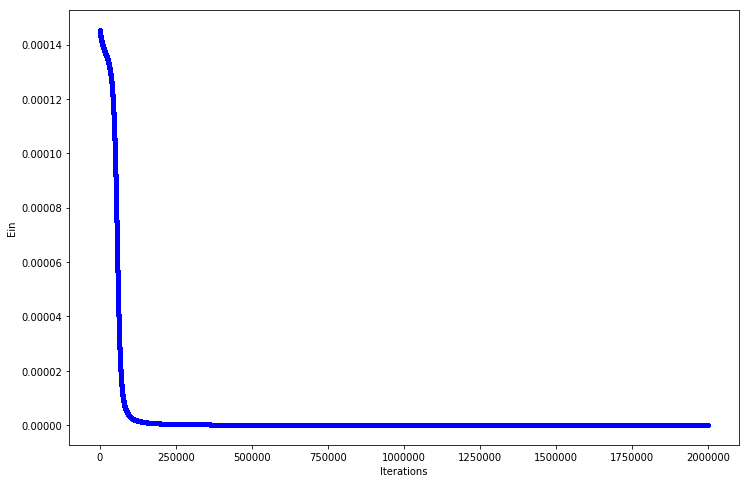

In [29]:
import matplotlib.pyplot as plt
matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Ein')
ax.set_xlabel('Iterations')
H = ax.plot(range(2*(10**6)),Err,'b.')

## formal test

In [30]:
from sklearn.metrics import mean_squared_error
DelOutTt,sLTest,theta_VectorTest = fwd_Propagation(Wt_Neural,X2,L_NN)
T_Out = np.sign(DelOutTt)
errorTest = np.sqrt(mean_squared_error(Y2, T_Out))
print("predicted output: ",T_Out)

predicted output:  [[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]


## final question 3
### 1 Variable Rate Gradient Descent
- we could see there's decline in Ein w.r.t learning curve improvement at every epoch 
### 2 and 3 steepest descent and conjugate gradient descent
 - may be increasing number of epochs and increasing learning rate could improve these terms